Name : Pradeep Jaladi & Avinash Alapati

Course : DSC-530 - Data Exploratory And Analysis

Assignment : Final Term Project - NoShow Appointments

Date : 11/22/2020


In [265]:
# Importing the library needed for no show appointment data

import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
from matplotlib import pylab

import seaborn as sns
sns.set_style("whitegrid")

In [266]:
# Reading the data noshow csv file
noShow = pds.read_csv('NoShowAppointments.csv')
noShow.dataframeName = 'NoShowAppointments.csv'

nRow, nCol = noShow.shape
print(f'There are {nRow} rows and {nCol} columns\n')

# Data details and NaN & duplicate check
noShow.isnull().sum()
noShow.info()

print(f'\nThere are {sum(noShow.duplicated())} duplicates found')

There are 110527 rows and 14 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB

There are 0 duplicates found


In [267]:
# Cleaning the header column names
noShow.rename(columns = { 'PatientId' : 'PatientID',
                          'Alcoolism' : 'Alchoholism',
                          'Hipertension' : 'Hypertension',
                          'Handcap' : 'Handicap',
                          'SMS_received' : 'SMSSent',
                          'No-show' : 'NoShow'}, inplace = True)

print(noShow.columns)

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSSent', 'NoShow'],
      dtype='object')


In [268]:
# Setting the date & time format

noShow['PatientId'] = noShow['PatientID'].astype('int64')
noShow['ScheduledDay'] = pds.to_datetime(noShow['ScheduledDay'])
noShow['AppointmentDay'] = pds.to_datetime(noShow['AppointmentDay'])

#Getting day of a week
noShow['DayOfWeek'] = noShow.AppointmentDay.apply(lambda time: time.day_name())

noShow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMSSent         110527 non-null  int64              
 13  NoShow        

In [269]:
#Instead of using Histogram we are using unique to determine the outliners
print('Age:',sorted(noShow.Age.unique())) 
print('Gender:',noShow.Gender.unique())
print('Status:',noShow.NoShow.unique())
print('Diabetes:',noShow.Diabetes.unique())
print('Alchoholism:',noShow.Alcoholism.unique())
print('Hypertension:',noShow.Hypertension.unique())
print('Handicap:',noShow.Handicap.unique())
print('Scholarship:',noShow.Scholarship.unique())
print('Sms_Reminder:',noShow.SMSSent.unique())
print('NoShow:',noShow.NoShow.unique())
print('DayOfWeek:',noShow.DayOfWeek.unique())


Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Status: ['No' 'Yes']
Diabetes: [0 1]
Alchoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
Sms_Reminder: [0 1]
NoShow: ['No' 'Yes']
DayOfWeek: ['Friday' 'Tuesday' 'Monday' 'Wednesday' 'Thursday' 'Saturday']


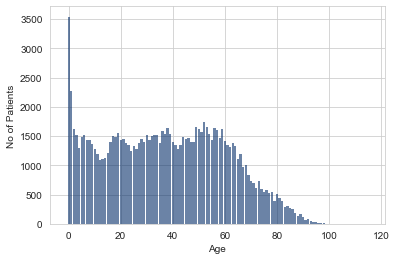

<Figure size 576x432 with 0 Axes>

In [270]:
# Diplaying the histogram data for the variables related to NoShow
import thinkplot
import thinkstats2

ageHist = thinkstats2.Hist(noShow.Age)
thinkplot.Hist(ageHist)
thinkplot.Show(xlabel='Age', ylabel='No of Patients')


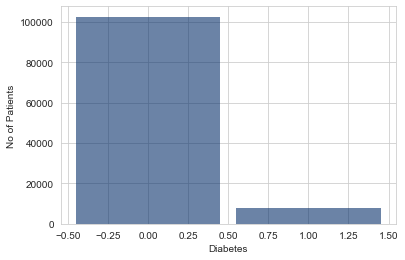

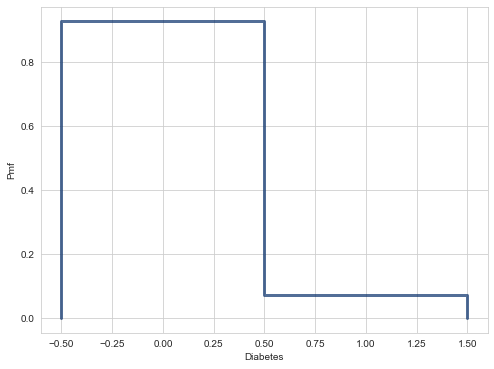

In [271]:
#Diabetes histgram and pmf
diabetesHist = thinkstats2.Hist(noShow.Diabetes)
diabetespmf = thinkstats2.Pmf(noShow.Diabetes)

thinkplot.Hist(diabetesHist)
thinkplot.Show(xlabel='Diabetes', ylabel='No of Patients')

thinkplot.Pmf(diabetespmf)
thinkplot.Config(xlabel='Diabetes', ylabel='Pmf')


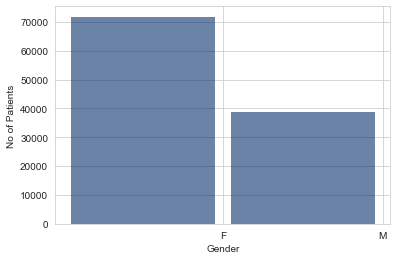

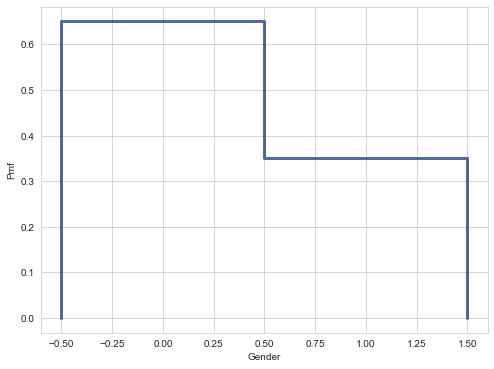

In [272]:
# Gender Histogram and PMF
genderHist = thinkstats2.Hist(noShow.Gender)
genderDF = pds.factorize(noShow.Gender)[0]

genderpmf = thinkstats2.Pmf(genderDF)

thinkplot.Hist(genderHist)
thinkplot.Show(xlabel='Gender', ylabel='No of Patients')

thinkplot.Pmf(genderpmf)
thinkplot.Config(xlabel='Gender', ylabel='Pmf')



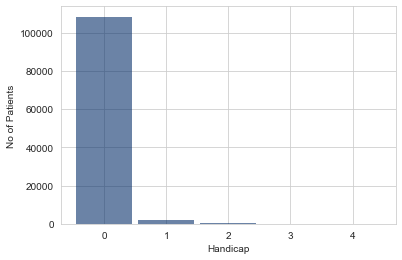

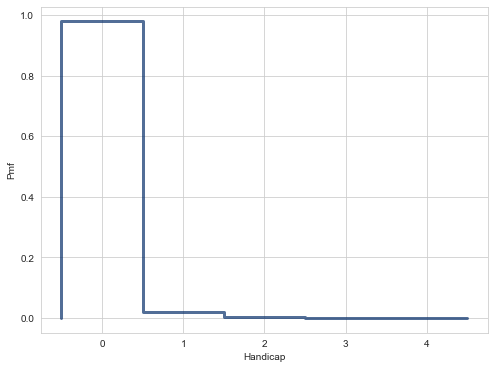

In [273]:
# Handicap Histogram and PMF
handicapHist = thinkstats2.Hist(noShow.Handicap)
genderpmf = thinkstats2.Pmf(noShow.Handicap)

thinkplot.Hist(handicapHist)
thinkplot.Show(xlabel='Handicap', ylabel='No of Patients')

thinkplot.Pmf(genderpmf)
thinkplot.Config(xlabel='Handicap', ylabel='Pmf')


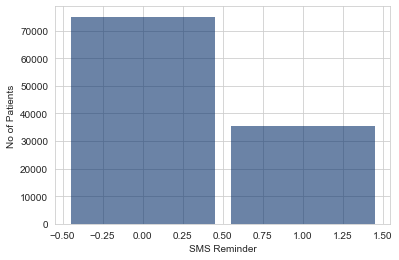

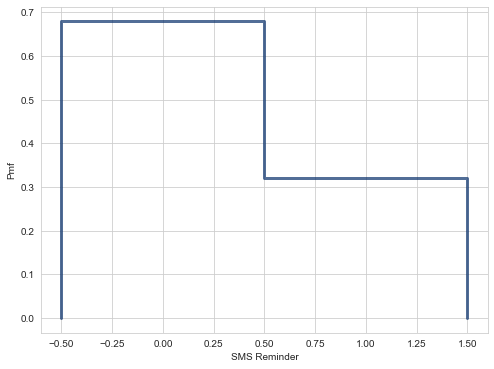

In [274]:

smsHist = thinkstats2.Hist(noShow.SMSSent)
smspmf = thinkstats2.Pmf(noShow.SMSSent)

thinkplot.Hist(smsHist)
thinkplot.Show(xlabel='SMS Reminder', ylabel='No of Patients')

thinkplot.Pmf(smspmf)
thinkplot.Config(xlabel='SMS Reminder', ylabel='Pmf')

By watching the above historgrams & unique values the age & handicap has some outliners. Age cannot be less than 0 and more than 100 is high probability. 

We can remove the Age less than 0 and greater than 100.
We can remove the rows which has a value of 2

In [275]:
# Removing the outliners
noShow = noShow[(noShow.Age >= 0) & (noShow.Age <= 100)]
noShow = noShow[(noShow.Handicap == 0) | (noShow.Handicap == 1)]

# Printing the data frame information
noShow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110320 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110320 non-null  float64            
 1   AppointmentID   110320 non-null  int64              
 2   Gender          110320 non-null  object             
 3   ScheduledDay    110320 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110320 non-null  datetime64[ns, UTC]
 5   Age             110320 non-null  int64              
 6   Neighbourhood   110320 non-null  object             
 7   Scholarship     110320 non-null  int64              
 8   Hypertension    110320 non-null  int64              
 9   Diabetes        110320 non-null  int64              
 10  Alcoholism      110320 non-null  int64              
 11  Handicap        110320 non-null  int64              
 12  SMSSent         110320 non-null  int64              
 13  NoShow        

In [276]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for NoShow Appointments', fontsize=15)
    plt.show()
    
    
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pds.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

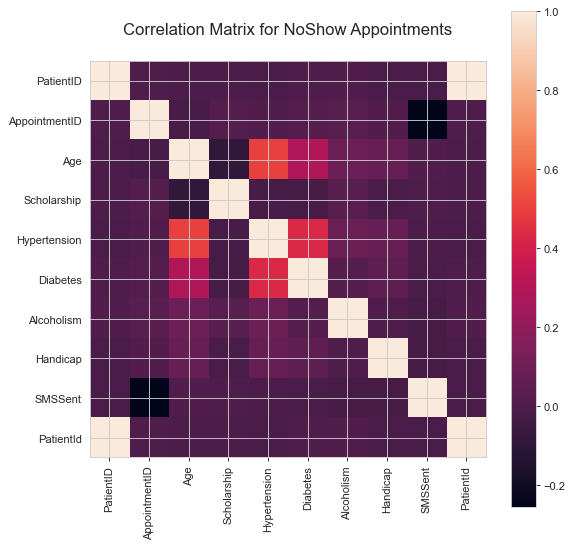

In [277]:
plotCorrelationMatrix(noShow, 8)

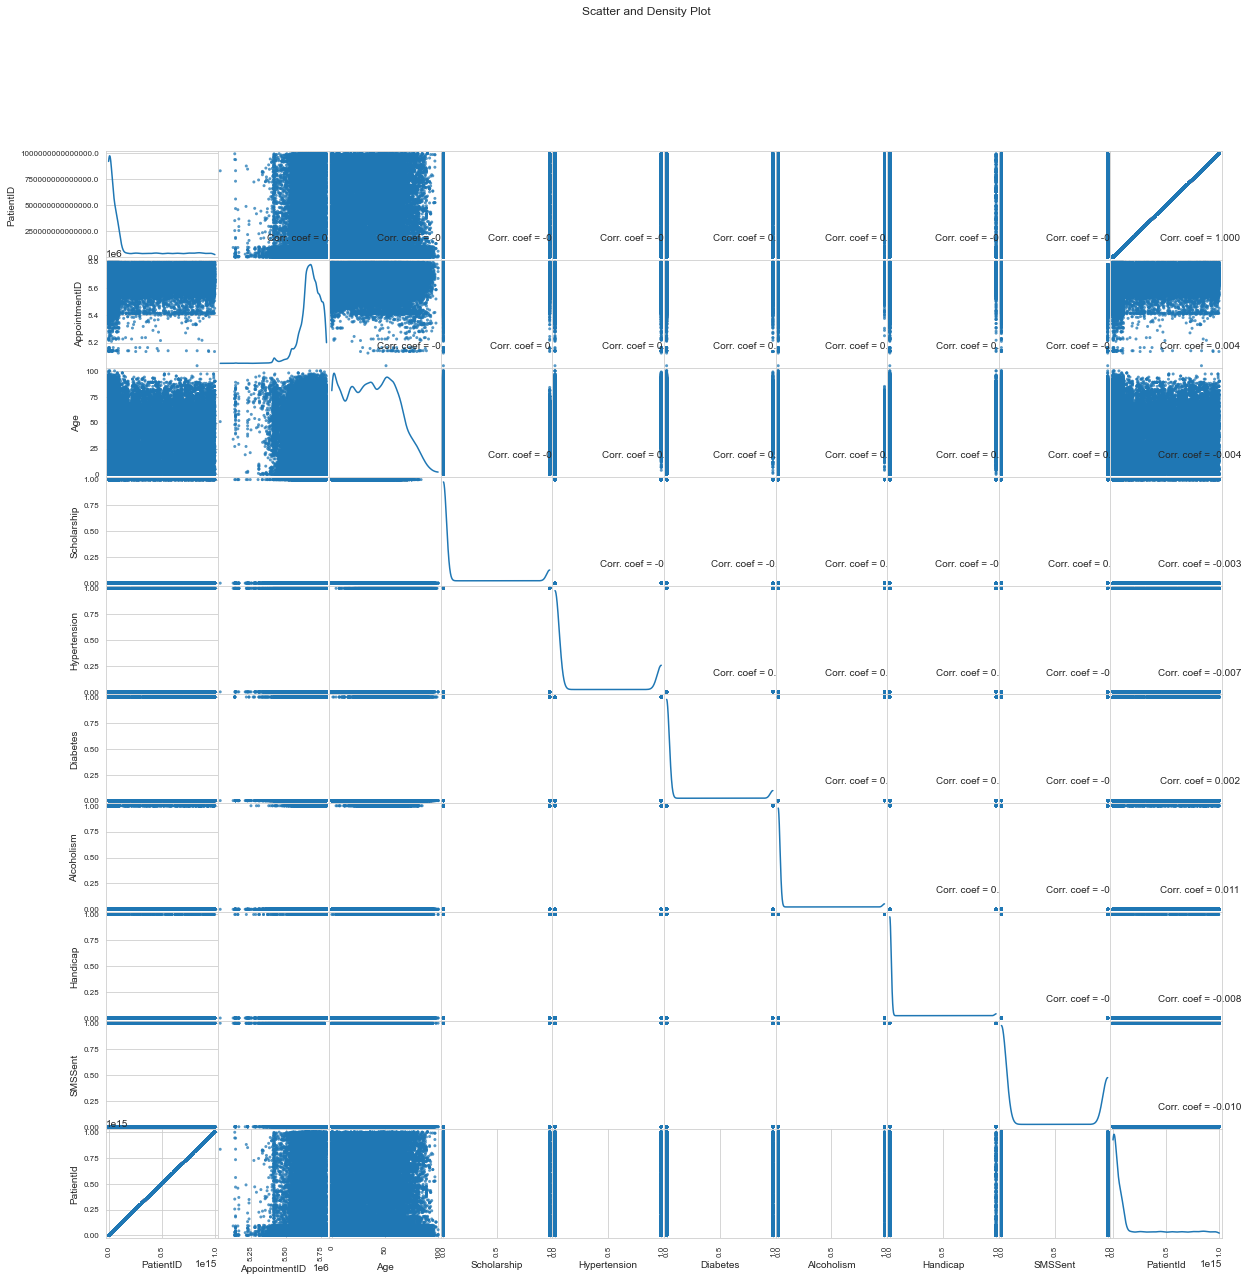

In [278]:
plotScatterMatrix(noShow, 20, 10)

In [279]:
#Descriptive Statistics for NoShow
noShow.describe()


,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,PatientId
count,1.103200e+05,1.103200e+05,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000,1.103200e+05
mean,1.475170e+14,5.675297e+06,37.066044,0.098287,0.196836,0.071610,0.030384,0.018474,0.321193,1.475170e+14
std,2.561271e+14,7.129939e+04,23.091170,0.297703,0.397609,0.257842,0.171643,0.134657,0.466937,2.561271e+14
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.920000e+04
25%,4.174315e+12,5.640276e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.174315e+12
50%,3.174700e+13,5.680566e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.174700e+13
75%,9.439380e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.439380e+13
max,9.999820e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.999820e+14


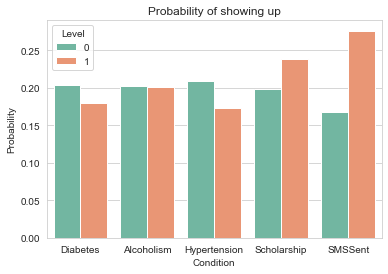

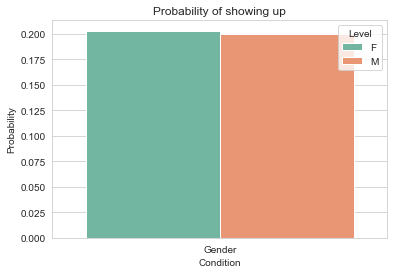

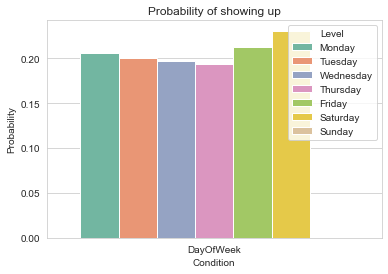

In [280]:
def probStatusCategorical(group_by):
    rows = []
    for item in group_by:
        for level in noShow[item].unique():
            row = {'Condition': item}
            total = len(noShow[noShow[item] == level])
            n = len(noShow[(noShow[item] == level) & (noShow.NoShow == 'Yes')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pds.DataFrame(rows)

sns.barplot(data = probStatusCategorical(['Diabetes', 'Alcoholism', 'Hypertension', 'Scholarship', 'SMSSent']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()


sns.barplot(data = probStatusCategorical(['Gender']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

sns.barplot(data = probStatusCategorical(['DayOfWeek']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2',
           hue_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                       'Saturday', 'Sunday'])
plt.title('Probability of showing up')
plt.ylabel('Probability')
plt.show()

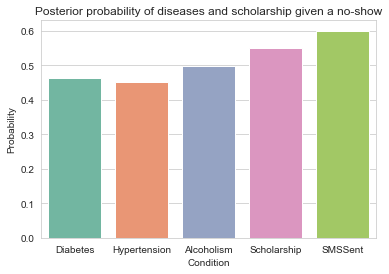

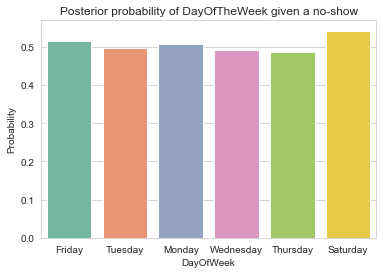

In [281]:
def posteriorNoShow(condition):
    levels = list(noShow[condition].unique())
    if condition not in ['DayOfWeek', 'Gender']: 
        levels.remove(0)
    rows = []
    for level in levels:
        p = len(noShow[noShow[condition] == level]) / len(noShow)
        p1 = len(noShow[(noShow[condition] == level) & (noShow.NoShow == 'Yes')]) / len(noShow[noShow.NoShow == 'Yes'])
        p2 = len(noShow[(noShow[condition] == level) & (noShow.NoShow == 'No')]) / len(noShow[noShow.NoShow == 'No'])
        if len(levels) > 1:
            rows.append({'Levels': level, 
                         'Probability': (p * p1) / (p * p1 + p * p2)})
        else:
            rows.append({'Condition': condition,
                         'Probability': (p * p1) / (p * p1 + p * p2)})
    return rows
    
tuples = []
tuples.extend(posteriorNoShow('Diabetes'))
tuples.extend(posteriorNoShow('Hypertension'))
tuples.extend(posteriorNoShow('Alcoholism'))
tuples.extend(posteriorNoShow('Scholarship'))
tuples.extend(posteriorNoShow('SMSSent'))


sns.barplot(data = pds.DataFrame(tuples)[['Condition', 'Probability']], 
            x = 'Condition', y = 'Probability', palette = 'Set2')
plt.title('Posterior probability of diseases and scholarship given a no-show')
plt.ylabel('Probability')
plt.show()


sns.barplot(data = pds.DataFrame(posteriorNoShow('DayOfWeek')), 
            x = 'Levels', y = 'Probability', palette = 'Set2')
plt.xlabel('DayOfWeek')
plt.ylabel('Probability')
plt.title('Posterior probability of DayOfTheWeek given a no-show')
plt.show()

DayOfWeek: [4 1 0 2 3 5]


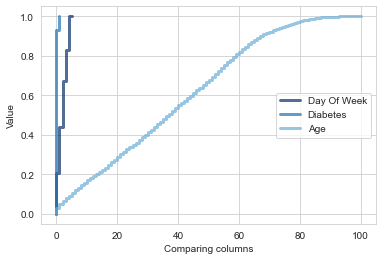

In [282]:
# CDF of Day of Week
noShow.DayOfWeek = noShow.AppointmentDay.apply(lambda time: time.dayofweek)

print('DayOfWeek:',noShow.DayOfWeek.unique())

noShow = noShow[(noShow.Age >= 0) & (noShow.Age <= 100)]

#saturday_df = noShow.DayOfWeek[noShow.DayOfWeek == 5]
#monday_df = noShow.DayOfWeek[noShow.DayOfWeek == 0]
#other_df = noShow.DayOfWeek[(noShow.DayOfWeek != 0) & (noShow.DayOfWeek != 5) ]

saturday_cdf = thinkstats2.Cdf(saturday_df, label='Saturday Appointments')
monday_cdf = thinkstats2.Cdf(monday_df, label='Monday Appointments')
other_cdf = thinkstats2.Cdf(other_df, label='Other Days')

#thinkplot.PrePlot(3)
#thinkplot.Cdfs([saturday_cdf, monday_cdf, other_cdf])
#thinkplot.Config(xlabel='DayWise comparsion', ylabel='Days', loc='center right', legend = True)


dayOfWeek_cdf = thinkstats2.Cdf(noShow.DayOfWeek, label='Day Of Week')
diabetics_cdf = thinkstats2.Cdf(noShow.Diabetes, label='Diabetes')
age_cdf = thinkstats2.Cdf(noShow.Age, label='Age')

thinkplot.PrePlot(3)
thinkplot.Cdfs([dayOfWeek_cdf, diabetics_cdf, age_cdf])
thinkplot.Config(xlabel='Comparing columns', ylabel='Value', loc='center right', legend = True)


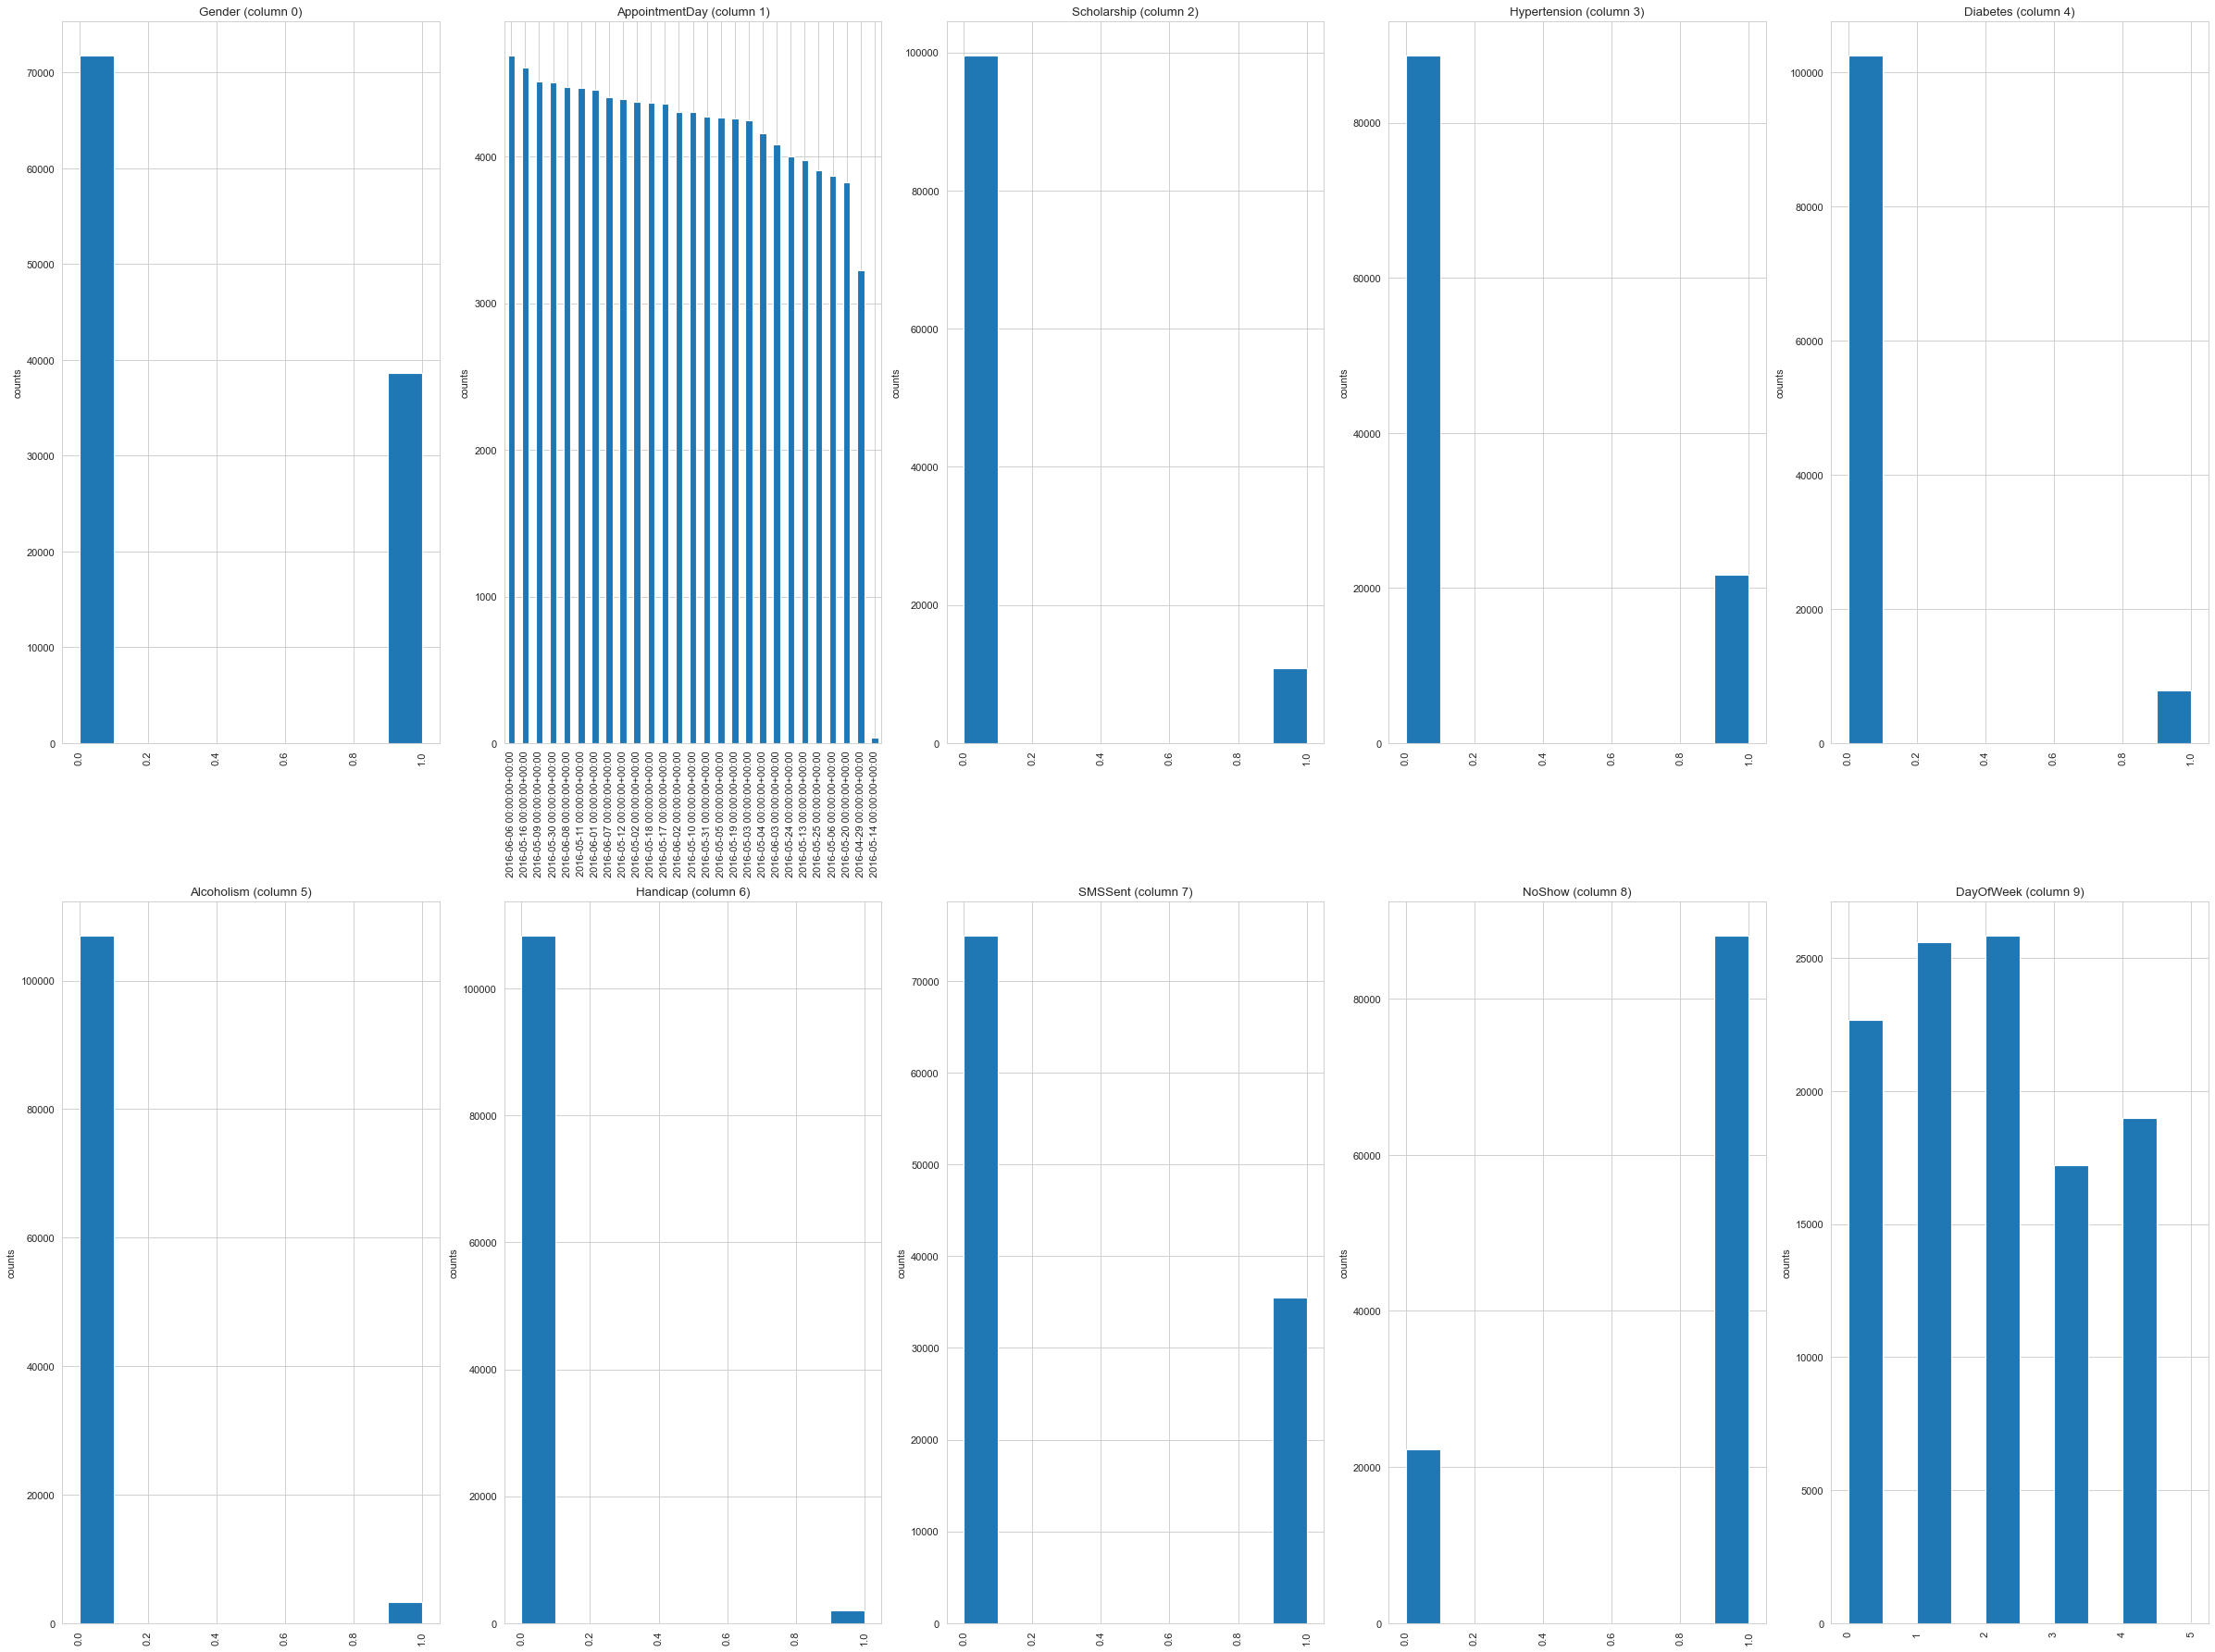

In [294]:
# Scatter Plots

plotPerColumnDistribution(noShow, 10, 5)

In [298]:
import statsmodels.formula.api as smf

# Assuming the patient with sms reminder and diabetics shows up for appointment
model = smf.ols('NoShow ~ SMSSent==1 + Diabetes==0', data=noShow)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NoShow   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     910.3
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:56:48   Log-Likelihood:                -54942.
No. Observations:              110320   AIC:                         1.099e+05
Df Residuals:                  110317   BIC:                         1.099e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.8522      0.005    187.559      0.000       0.843       0.861
SMSSent == 1[T.True]     -0.1088      0.003    -42.365      0.000      -0.114      -0.104
Diabetes == 0[T.True]    -0.0207      0.005     -4.450      0.000      -0.030      -0.012
==============================================================================
Omnibus:                    22163.136   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38927.266
Skew:                          -1.451   Prob(JB):                         0.00
Kurtosis:                       3.211   Cond. No.                         7.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
formula='NoShow ~ SMSSent + C(Diabetes)'
model = smf.poisson(formula, data=noShow)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.976419
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                 NoShow   No. Observations:               110320
Model:                        Poisson   Df Residuals:                   110317
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                0.001704
Time:                        11:56:55   Log-Likelihood:            -1.0772e+05
converged:                       True   LL-Null:                   -1.0790e+05
Covariance Type:            nonrobust   LLR p-value:                 1.343e-80
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1845      0.004    -44.769      0.000      -0.193      -0.176
C(Diabetes)[T.1]     0.0256      0.013      1.980      0.048       0.000       0.051
SMSSent             -0.1399      0.007    -18.867      0.000      -0.154      -0.125
====================================================================================
"""

In [291]:
#Assuming that the patient with hypertension shows up for appointment
model = smf.ols('NoShow ~ SMSSent==1 + Hypertension==0', data=noShow)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NoShow   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     971.5
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:52:43   Log-Likelihood:                -54882.
No. Observations:              110320   AIC:                         1.098e+05
Df Residuals:                  110317   BIC:                         1.098e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.8617      0.003    305.666      0.000       0.856       0.867
SMSSent == 1[T.True]         -0.1088      0.003    -42.384      0.000      -0.114      -0.104
Hypertension == 0[T.True]    -0.0357      0.003    -11.845      0.000      -0.042      -0.030
==============================================================================
Omnibus:                    22118.091   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38806.111
Skew:                          -1.449   Prob(JB):                         0.00
Kurtosis:                       3.211   Cond. No.                         4.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
#Assuming that the patient with age > 60
model = smf.ols('NoShow ~ Age>60', data=noShow)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NoShow   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     394.2
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.46e-87
Time:                        11:53:48   Log-Likelihood:                -55648.
No. Observations:              110320   AIC:                         1.113e+05
Df Residuals:                  110318   BIC:                         1.113e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8473      0.003    307.118      0.000       0.842       0.853
Age < 60[T.True]    -0.0609      0.003    -19.854      0.000      -0.067      -0.055
==============================================================================
Omnibus:                    22646.848   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40268.805
Skew:                          -1.476   Prob(JB):                         0.00
Kurtosis:                       3.201   Cond. No.                         4.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
#Prediction

noShow.Gender = noShow.Gender.apply(lambda x: 1 if x == 'M' else 0)
noShow.NoShow = noShow.NoShow.apply(lambda x: 1 if x == 'No' else 0)

features_train = noShow[['Age', 'DayOfWeek', 'Diabetes', 'Alcoholism', 'Hypertension', 'Scholarship', 'SMSSent']].iloc[:56500]

labels_train = noShow.NoShow[:56500]

features_test = noShow[['Age', 'DayOfWeek', 'Diabetes', 'Alcoholism', 'Hypertension', 'Scholarship', 'SMSSent']].iloc[56500:]

labels_test = noShow.NoShow[56500:]

features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56500 entries, 0 to 56594
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     56500 non-null  int64
dtypes: int64(1)
memory usage: 882.8 KB


In [311]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

clf =  MultinomialNB().fit(features_train, labels_train)
print('Accuracy:', round(accuracy_score(labels_test, 
                                        clf.predict(features_test)), 2) * 100, '%')

Accuracy: 100.0 %
